# Exploratory Data Analysis & Simple Linear Regression

### Task

We would like to build a predictive model to help us determine the median value of homes in a metropolitan city.

### Input features
1) Crime_rate: per capita crime rate by town
2) Mountain_view: 1 if property has mountain views; 0 otherwise
3) Avg_room_num: average number of rooms per dwelling
4) Low_stat: % of lower income individuals in area

### Target variable
1) Value: Median value of homes in $1000's

## Exploratory Data Analysis

Simple EDA framework:
 - Understand the data - dataset structure, check for missing values, basic statistics
 - Clean and preprocess - handle missing values, encode categorical variables, feature scaling
 - Explore relationships - analyse relationships between features and target variable, scatterplots, heatmaps, identify clusters
 - Assess feature importance - significance of features using statistical tests, Random Forests to evaluate feature importance
 - Iterate and refine - consider additional visualisations and techniques, refine data cleaning and preprocessing


These are some questions we would like to answer:

1. What is the most important factor in determining the median value of homes in the metropolitan city dataset?
2. Is there a preference for homes with mountain views?
3. Are certain demographic factors, such as the percentage of lower-income individuals, correlated with lower median home values?

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [3]:
# Mounting notebook (for Google Colab users)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing_dataset.csv')
df.head()

,Crime_rate,Mountain_view,Avg_room_num,Low_stat,Value
0,0.00632,No,6.575,4.98,24.0
1,0.02731,No,6.421,9.14,21.6
2,0.02729,No,7.185,4.03,34.7
3,0.03237,No,6.998,2.94,33.4
4,0.06905,No,7.147,5.33,36.2


### Understand the data

In [5]:
# Dimensions
df.shape

(Index(['Crime_rate', 'Mountain_view', 'Avg_room_num', 'Low_stat', 'Value'], dtype='object'),
 (506, 5))

In [7]:
# Missing values
df.isnull().sum()

Crime_rate       0
Mountain_view    0
Avg_room_num     0
Low_stat         0
Value            0
dtype: int64

In [9]:
# Summary statistics
df.describe()

,Crime_rate,Avg_room_num,Low_stat,Value
count,506.000000,506.000000,506.000000,506.000000
mean,3.613524,6.284634,12.653063,22.532806
std,8.601545,0.702617,7.141062,9.197104
min,0.006320,3.561000,1.730000,5.000000
25%,0.082045,5.885500,6.950000,17.025000
50%,0.256510,6.208500,11.360000,21.200000
75%,3.677083,6.623500,16.955000,25.000000
max,88.976200,8.780000,37.970000,50.000000


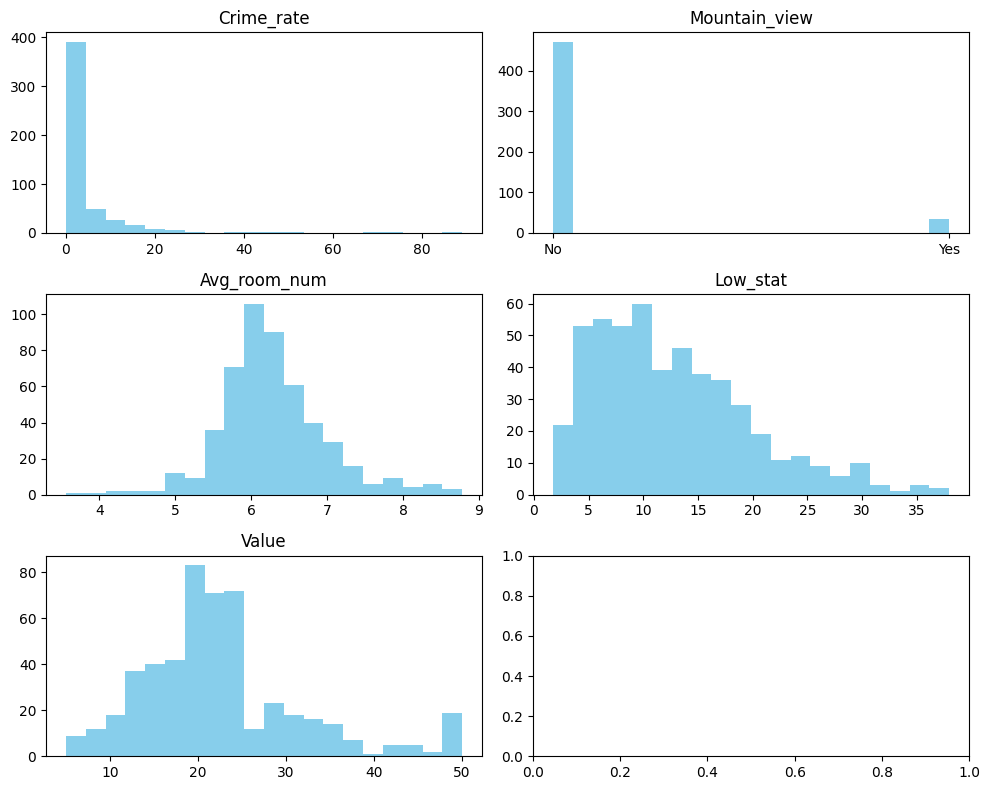

In [15]:
columns = df.columns.tolist()

fig, axs = plt.subplots(3, 2, figsize = (10, 8))
axs = axs.flatten() # flattening for easy iteration

# Plot histograms in subpolts # Using for loop for efficiency
for i, column in enumerate(columns):
    axs[i].hist(df[column], bins = 20, color = 'skyblue')
    axs[i].set_title(column)

plt.tight_layout()

### Clean and Preprocess

In [26]:
# No missing values
# Unique entries for categorical variable
df['Mountain_view'].unique()

array(['No', 'Yes'], dtype=object)

In [5]:
# Encoding categorical variable
df['Mountain_view'] = df['Mountain_view'].map({'No': 0, 'Yes': 1})

In [7]:
# Feature scaling
features = df.drop(columns=['Mountain_view', 'Value'])

# Initialize StandardScaler
scaler = StandardScaler()

# Apply feature scaling
scaled_features = scaler.fit_transform(features)

# Create DataFrame for scaled features, then concatenate with Mountain_view and Value
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

scaled_df['Mountain_view'] = df['Mountain_view']
scaled_df['Value'] = df['Value']
scaled_df.head()

,Crime_rate,Avg_room_num,Low_stat,Mountain_view,Value
0,-0.419782,0.413672,-1.075562,0,24.0
1,-0.417339,0.194274,-0.492439,0,21.6
2,-0.417342,1.282714,-1.208727,0,34.7
3,-0.416750,1.016303,-1.361517,0,33.4
4,-0.412482,1.228577,-1.026501,0,36.2


### Explore Relationships

<Figure size 400x400 with 0 Axes>

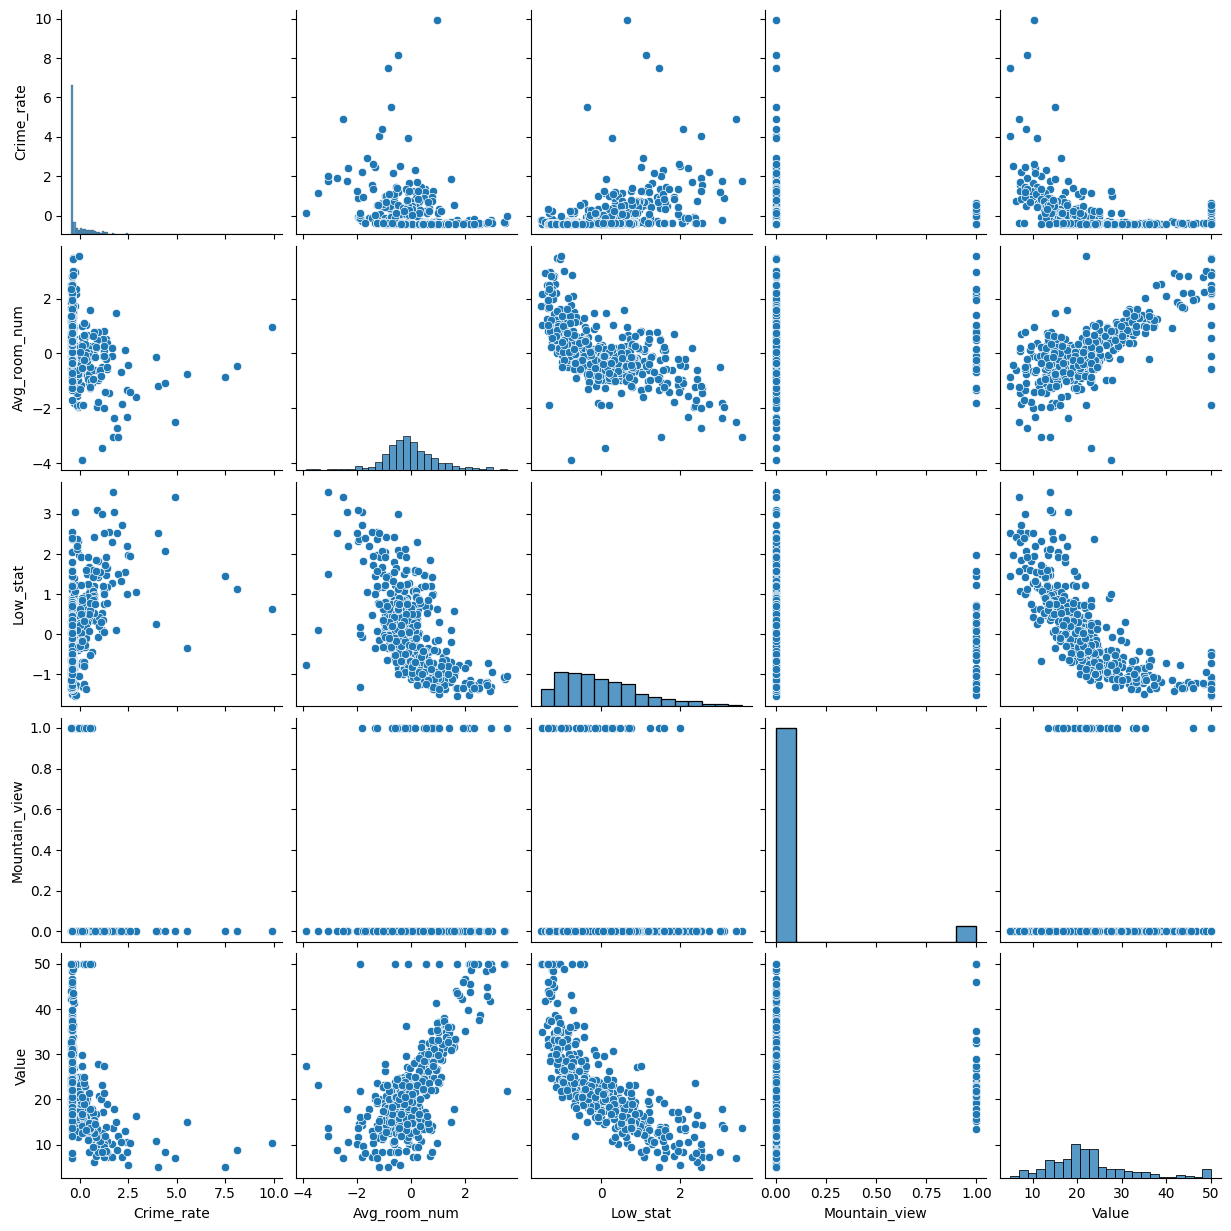

In [8]:
# Pairplot for variable correlations
plt.figure(figsize=(4, 4))
sns.pairplot(scaled_df)

Text(0.5, 1.0, 'Correlation Matrix')

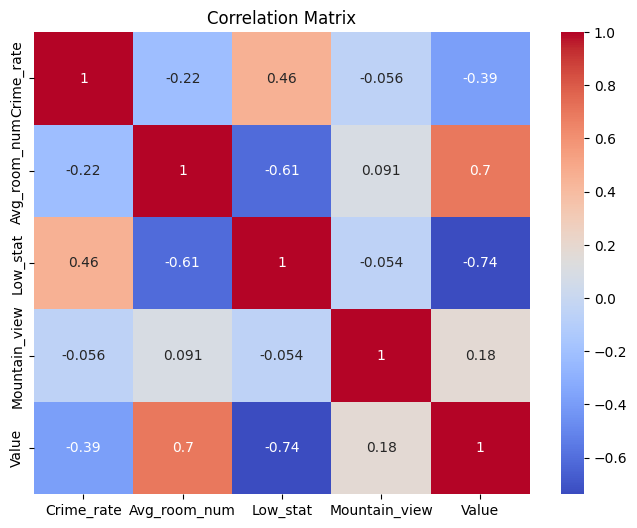

In [10]:
# Setting figure margins
plt.figure(figsize=(8, 6))

# Heatmap
sns.heatmap(scaled_df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')

## Building the Simple Linear Model

In [9]:
# Independent and dependent variables
X = df['Low_stat']
y = df['Value']

In [10]:
X.shape, y.shape

((506,), (506,))

In [13]:
# Reshaping input matrix
X = X.values.reshape(-1,1)
X.shape

(506, 1)

Text(0, 0.5, 'Median value of homes in $1000s')

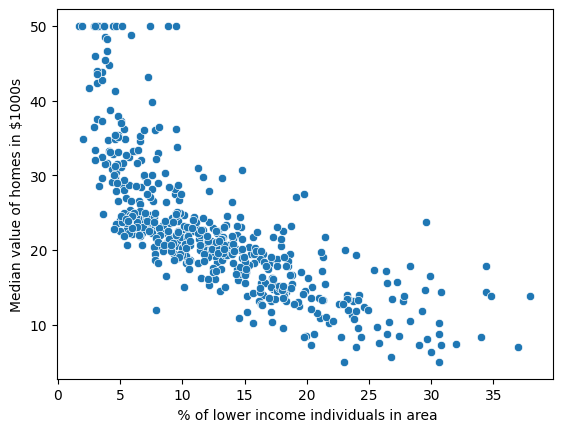

In [14]:
# Scatterplot of observations
sns.scatterplot(data = df, x = 'Low_stat', y = 'Value')
plt.xlabel(' % of lower income individuals in area')
plt.ylabel('Median value of homes in $1000s')

In [15]:
# Split the data into training (80%) and testing (20%) data subsets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
# create an empty linear regression model, give it an appropriate name
housing_model = LinearRegression()

# Fit on training data
housing_model.fit(Xtrain,ytrain)

LinearRegression()

In [18]:
print('Intercept: \n', housing_model.intercept_)
print('Coefficients: \n', housing_model.coef_)

Intercept: 
 34.76519272372788
Coefficients: 
 [-0.95648761]


In [19]:
# Use the linear regression model to make predictions on the training inputs
y_pred = housing_model.predict(Xtrain)

Text(0, 0.5, 'Median value of homes in $1000s')

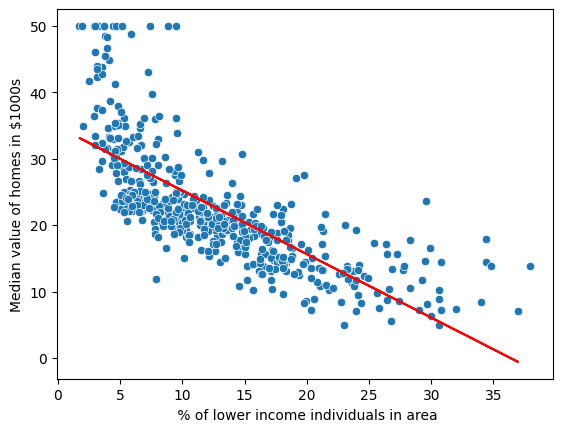

In [20]:
# Plot line of best fit against observations
sns.scatterplot(data = df, x = 'Low_stat' , y = 'Value')
plt.plot(Xtrain, y_pred, c = 'red')
plt.xlabel(' % of lower income individuals in area')
plt.ylabel('Median value of homes in $1000s')

## Model Evaluation

In [21]:
# First, we use our model to make predictions on the unseen data
y_pred_test = housing_model.predict(Xtest)

After we have our predicitions, we can obtain some performance metrics.

In [22]:
# Calculate R-squared, proportion of variance in median house value that can be explain by low_stat
R_sq = r2_score(ytest, y_pred_test)
print("R-squared is ", round(R_sq*100), "%")

R-squared is  43 %


In [23]:
# the average absolute difference between the predicted values and the actual values
MAE = mean_absolute_error(ytest, y_pred_test)
MAE   # Remember to interpret in $1000s

4.864010561669802